In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV



def df_confusion(label,pred):
    """
    transfer confusion matrix to data frame
    :param label: ground truth label
    :param pred: predicted label
    :return: DataFrame
    """
    return pd.DataFrame(confusion_matrix(label, pred,labels=['G2',"M"]),columns=['pred_G2','pred_M'],index=['ground_true_G2','ground_true_M'])

def check_classifier(clf,x_train,x_test,y_train,y_test):
    """
    check the accuracy of selected classifier with train and test set, also get the confusion matrix to show the prediction label with ground truth label
    :param clf: classifier
    :param x_train: train features
    :param x_test: test features
    :param y_train: ground truth label of training set
    :param y_test:  ground truth label of test set
    :return: hemtmap of confusion matrix
    """
    clf_hp=make_pipeline(StandardScaler(),clf)
    clf_hp.fit(x_train,y_train)
    predicted_train = clf_hp.predict(x_train)
    accuracy_train = accuracy_score(y_train,predicted_train)
    print(f'the accuracy of model run with train data {accuracy_train}')
    predicted_test = clf_hp.predict(x_test)
    accuracy_test = accuracy_score(y_test,predicted_test)
    print(f'the accuracy of model run with test data {accuracy_test}')
    cm_train = df_confusion(y_train,predicted_train)
    cm_test = df_confusion(y_test, predicted_test)
    CM=[cm_train,cm_test]
    title=['train_data','test_data']
    fig, axs= plt.subplots(ncols=1,nrows=2,figsize=(8,5))
    for index,cm  in enumerate(CM):
        axs[index].set_title(f'{title[index]}')
        sns.heatmap(cm, annot=True,fmt='g',ax=axs[index])
    plt.show()

def preprecess_classifier(data,features=['intensity_mean_EdU_cyto','nuclei_count','DAPI_total_norm','EdU_mean_corr_norm','area_cell_norm', 'area_cell_norm_log2','area_nucleus_norm',],label='cell_cycle_detailed'):
    """
    preprocessing of data
    :param data: DataFrame
    :param features: the interesting columns using to classifier
    :param label: ground truth label
    :return: x_train,x_test,y_train,y_test
    """
    X,Y=data[features],data[[label]]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=2/3,random_state=42,shuffle=True,stratify=Y)
    y_train=np.ravel(y_train)
    y_test=np.ravel(y_test)
    # define the classifier
    clf_svm = svm.SVC( random_state=24,C=10,gamma='auto')
    clf_log=LogisticRegression(random_state=42,C=10,solver='newton-cg',max_iter=10000)
    clf_rf = RandomForestClassifier(random_state=11,n_estimators=40)
    clf_sgd=SGDClassifier(loss="log_loss", penalty="l2", max_iter=10000)

    # using the cross validation to compare different  clf
    CLF=[clf_svm,clf_log,clf_rf,clf_sgd]
    for clf in CLF:
        clf_tem=make_pipeline(StandardScaler(),clf)
        score=cross_val_score(clf_tem,x_train,y_train,cv=5)
        print(f'the selected model: {clf}  Score:{score}  Mean:{score.mean()}')
    return x_train,x_test,y_train,y_test




In [2]:
df=pd.read_csv('/Users/haoranyue/Desktop/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS/cellcycle_summary/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS_singlecell_cellcycle.csv')

df.groupby('cell_cycle_detailed').count()

,Unnamed: 0,experiment,plate_id,well,well_id,image_id,cell_line,condition,Cyto_ID,area_cell,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,...,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018
G1,93968,93968,93968,93968,93968,93968,93968,93968,93968,93968,...,93968,93968,93968,93968,93968,93968,93968,93968,93968,93968
G2,35944,35944,35944,35944,35944,35944,35944,35944,35944,35944,...,35944,35944,35944,35944,35944,35944,35944,35944,35944,35944
Late S,17133,17133,17133,17133,17133,17133,17133,17133,17133,17133,...,17133,17133,17133,17133,17133,17133,17133,17133,17133,17133
M,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,...,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569
Polyploid,7424,7424,7424,7424,7424,7424,7424,7424,7424,7424,...,7424,7424,7424,7424,7424,7424,7424,7424,7424,7424
Polyploid (replicating),3839,3839,3839,3839,3839,3839,3839,3839,3839,3839,...,3839,3839,3839,3839,3839,3839,3839,3839,3839,3839
Sub-G1,2074,2074,2074,2074,2074,2074,2074,2074,2074,2074,...,2074,2074,2074,2074,2074,2074,2074,2074,2074,2074


In [3]:
data=pd.concat([df[df['cell_cycle_detailed']=="M"],df[df['cell_cycle_detailed']=="G2"].head(2569)])[[
       'intensity_mean_EdU_cyto',  'nuclei_count',
        'DAPI_total_norm',
       'EdU_mean_corr_norm','area_cell_norm', 'area_cell_norm_log2',
       'area_nucleus_norm','cell_cycle_detailed',]].reset_index()

# input data (2569 G2 cell + 2569 M cell)

In [4]:
x_train,x_test,y_train,y_test =preprecess_classifier(data=data)

the selected model: SVC(C=10, gamma='auto', random_state=24)  Score:[0.88759124 0.90948905 0.89927007 0.87737226 0.88467153]  Mean:0.8916788321167883
the selected model: LogisticRegression(C=10, max_iter=10000, random_state=42, solver='newton-cg')  Score:[0.84817518 0.88175182 0.86277372 0.84379562 0.85839416]  Mean:0.858978102189781
the selected model: RandomForestClassifier(n_estimators=40, random_state=11)  Score:[0.87883212 0.89927007 0.88759124 0.8919708  0.88759124]  Mean:0.889051094890511
the selected model: SGDClassifier(loss='log_loss', max_iter=10000)  Score:[0.84379562 0.86861314 0.8540146  0.83357664 0.85985401]  Mean:0.8519708029197082


In [ ]:
#using the GridSearchCV to select the best hyperparameters

clf_svm = svm.SVC( random_state=24,C=10,gamma='auto')
clf_svm_hp =GridSearchCV(clf_svm,{"C":[0.1,1,10,20],"kernel":['linear','poly','rbf','sigmoid']},cv=3,return_train_score=True)
clf_svm_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_svm_hp.cv_results_)
df_hp

In [ ]:
clf_rf = RandomForestClassifier(random_state=11,n_estimators=40)
clf_rf_hp =GridSearchCV(clf_rf,{"n_estimators":[30,40,50,60,70,80,90,100],"criterion":['entropy','log_loss'],'max_features':['sqrt','log2',],'class_weight':['balanced', 'balanced_subsample']},cv=5,return_train_score=True)
clf_rf_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_rf_hp.cv_results_)
df_hp

# RandomForestClassifier

the accuracy of model run with train data 0.9994160583941606
the accuracy of model run with test data 0.890251021599533


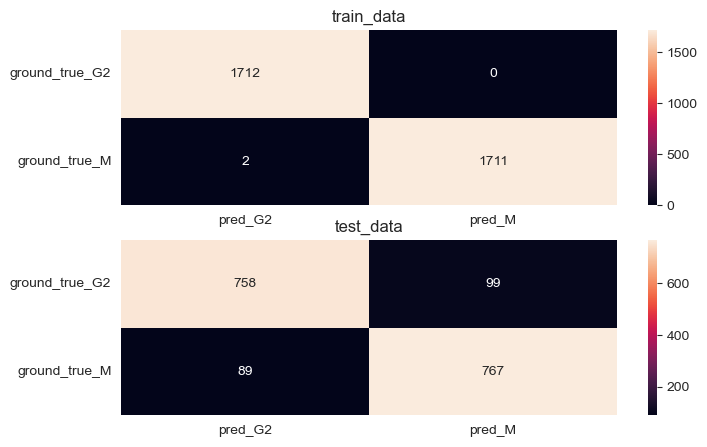

In [5]:
clf_rf_hp = RandomForestClassifier(random_state=11,n_estimators=70,max_features='sqrt',criterion='entropy',class_weight='balanced')
check_classifier(clf=clf_rf_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

# SVM

the accuracy of model run with train data 0.9083211678832117
the accuracy of model run with test data 0.8908347927612376


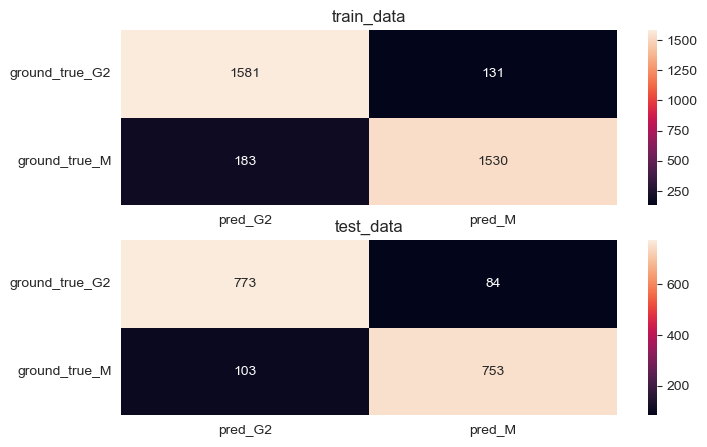

In [6]:
clf_svm_hp = svm.SVC( random_state=24,C=10,gamma='auto')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)